In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import timeit

NUM_RUNS = 1000

wine_data = pd.read_csv('./data/winequality-red.csv', sep=';')

X, y = wine_data.drop(columns=['quality'], inplace=False), wine_data['quality'] 
# y.hist()
# plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler_x = StandardScaler().fit(X_train)
X_train_transformed, X_test_transformed = scaler_x.transform(X_train), scaler_x.transform(X_test)

def lr_on_scaled_data():
    return LinearRegression().fit(X_train_transformed, y_train)

def lr_on_unscaled_data():
    return LinearRegression().fit(X_train, y_train)
    
time_scaled = timeit.timeit(lr_on_scaled_data, number=NUM_RUNS)
time_unscaled = timeit.timeit(lr_on_unscaled_data, number=NUM_RUNS)    

print(f"Time taken to fit Linear Regression on scaled data: {time_scaled:.4f} seconds")
print(f"Time taken to fit Linear Regression on unscaled data: {time_unscaled:.4f} seconds")

Time taken to fit Linear Regression on scaled data: 1.5737 seconds
Time taken to fit Linear Regression on unscaled data: 3.4616 seconds


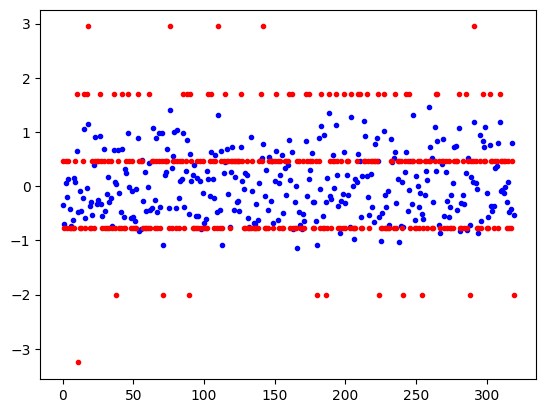

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

np.random.seed(42)

NUM_RUNS = 1000

wine_data = pd.read_csv('./data/winequality-red.csv', sep=';')

X, y = wine_data.drop(columns=['quality'], inplace=False), wine_data['quality'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler_x = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train.values.reshape(-1, 1))
X_train_transformed, X_test_transformed = scaler_x.transform(X_train), scaler_x.transform(X_test)
y_train_transformed, y_test_transformed = scaler_y.transform(y_train.values.reshape(-1, 1)), scaler_y.transform(y_test.values.reshape(-1, 1))

    
lr = LinearRegression()
lr.fit(X_train_transformed, y_train_transformed)

y_pred = lr.predict(X_test_transformed)

plt.plot(y_pred, "b.")
plt.plot(y_test_transformed, "r.")

<Axes: >

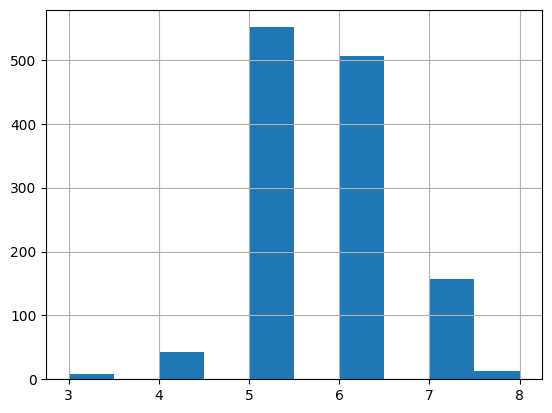

In [7]:
y_train.hist()

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


def load_data(
        path: str, 
        normalization: bool = False,
        dataset_name: str = 'winequality-red',
        target_column: str = 'quality',
        test_size: float = 0.2,):
    
    print(f"Loading {dataset_name} dataset")
    data = pd.read_csv(path, sep=';')
    X, y = data.drop(columns=[target_column], inplace=False), data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    if normalization:
        scaler_x = StandardScaler().fit(X_train)
        X_train_transformed, X_test_transformed = scaler_x.transform(X_train), scaler_x.transform(X_test)
        return X_train_transformed, X_test_transformed, y_train, y_test
    
    return X_train, X_test, y_train, y_test

def fit(X_train, y_train):
    return LinearRegression().fit(X_train, y_train)


In [4]:
X_train, X_test, y_train, y_test = load_data('./data/winequality-red.csv')
model = fit(X_train, y_train)
print(model.coef_)

Loading winequality-red dataset
[ 3.96923271e-02 -1.00683410e+00 -1.78054462e-01  3.12193463e-02
 -1.51247156e+00  4.66431718e-03 -3.43175349e-03 -3.34190733e+01
 -3.77737380e-01  8.64189727e-01  2.61265443e-01]


In [5]:
X_train, X_test, y_train, y_test = load_data('./data/winequality-red.csv', normalization=True)
model = fit(X_train, y_train)
print(model.coef_)

Loading winequality-red dataset
[ 0.07329431 -0.1922153  -0.04820682  0.05726068 -0.08677169  0.03315492
 -0.09430865 -0.05759058 -0.04179526  0.16032208  0.30417541]


In [9]:
wine_dataset = pd.read_csv('../../dataset/winequality-red.csv', sep=';')
wine_dataset.skew().sort_values(ascending=False)


chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
quality                 0.217802
pH                      0.193683
density                 0.071288
dtype: float64

<Axes: >

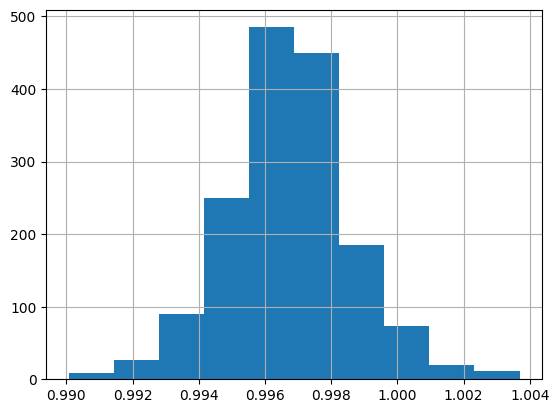

In [7]:
wine_dataset["density"].hist()

<Axes: >

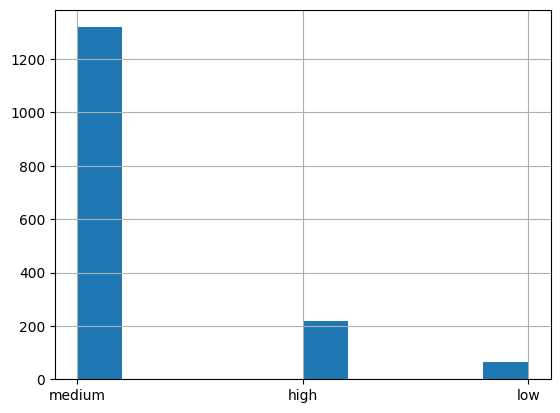

In [11]:
def quality_to_categorical_input(q):
    if q <= 4:
        return 'low'
    elif q <= 6:
        return 'medium'
    else:
        return 'high'
    
wine_dataset['quality_label'] = wine_dataset['quality'].apply(quality_to_categorical_input)
wine_dataset['quality_label'].hist()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def integer_encoding(q):
    if q == 'low':
        return 0
    elif q == 'medium':
        return 1
    else:
        return 2
    
wine_dataset['quality_integer_codes'] = wine_dataset['quality_label'].apply(integer_encoding) 
# wine_dataset['quality_integer_codes'].hist()

X = wine_dataset.drop(columns=['quality', 'quality_label', 'quality_integer_codes'])
y = wine_dataset['quality_integer_codes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler_x = StandardScaler().fit(X_train)
X_train_scaled = scaler_x.transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

lg = LogisticRegression()
lg.fit(X_train_scaled, y_train)

y_pred = lg.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))

[[  9   3   2]
 [118  67  75]
 [  7   4  35]]


/home/ali/Projects/dayche/machine-learning/projects/ml-design-patterns/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ali/Projects/dayche/machine-learning/projects/ml-design-patterns/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
